In [1]:
from datasets import FreiburgDataset, FreiburgTestDataset
import os
import numpy as np
from PIL import Image
import torch
import torchvision
import copy, csv
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

<AxesSubplot:xlabel='epoch'>

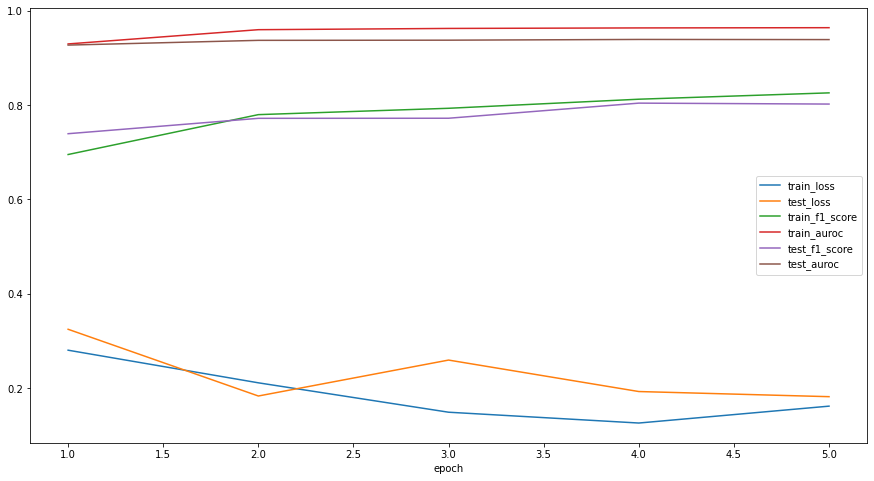

In [2]:
df = pd.read_csv('results/log.csv')
df.plot(x='epoch',figsize=(15,8))

In [2]:
model = torch.load('results/deeplabv3_model.pt', map_location=torch.device('cpu')).to('cpu')
model.eval()
_=1

In [3]:
fd_train = FreiburgDataset("data/freiburg/train")
fd_val = FreiburgDataset("data/freiburg/val")
fd_test = FreiburgTestDataset("data/freiburg/test")
batch_size=1
val_dataloader = torch.utils.data.DataLoader(fd_val, batch_size=batch_size, shuffle=True, collate_fn=cf)
test_dataloader = torch.utils.data.DataLoader(fd_test, batch_size=batch_size, shuffle=True)
val_img, val_mask = next(iter(val_dataloader))
test_img = next(iter(test_dataloader))

In [4]:
with torch.no_grad():
    #val_mask_pred = model(val_img)['out']
    test_mask_pred = model(test_img)['out']

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
val_img = dn(val_img)[0].transpose(1,2,0)
val_mask = dn(val_mask)[0]
#val_mask_pred = dn(val_mask_pred)[0]

test_img = dn(test_img)[0].transpose(1,2,0)
test_mask_pred = dn(test_mask_pred)[0]

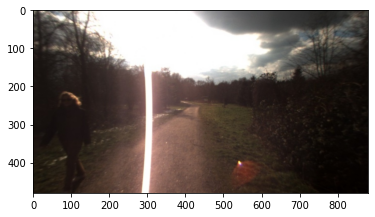

In [6]:
plt.imshow(test_img)

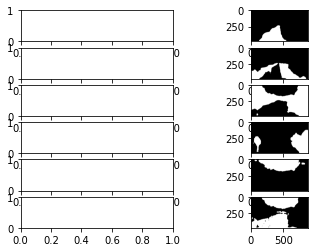

In [7]:
fig,axs=plt.subplots(6,2)
for i in range(6):
    #axs[i,0].imshow(test_mask[i], cmap='gray')
    axs[i,1].imshow(nut(test_mask_pred[i]), cmap='gray')

In [8]:
fd_train.obj_names

['Road', 'Grass', 'Vegetation', 'Tree', 'Sky', 'Obstacle']